# Read data (nc file)

In [1]:
import cdms2 as cdms

var = 'pr'
data = 'GPCP-2-3'
period = '197901-201907'
ver = 'v20200421'

dir = '/p/user_pub/PCMDIobs/PCMDIobs2_clims/atmos/'+var+'/'+data+'/'
nc = var+'_mon_'+data+'_BE_gn_'+period+'.'+ver+'.AC.nc'
f = cdms.open(dir+nc)
d = f[var]
print(d.shape)

(12, 72, 144)


# Plot data

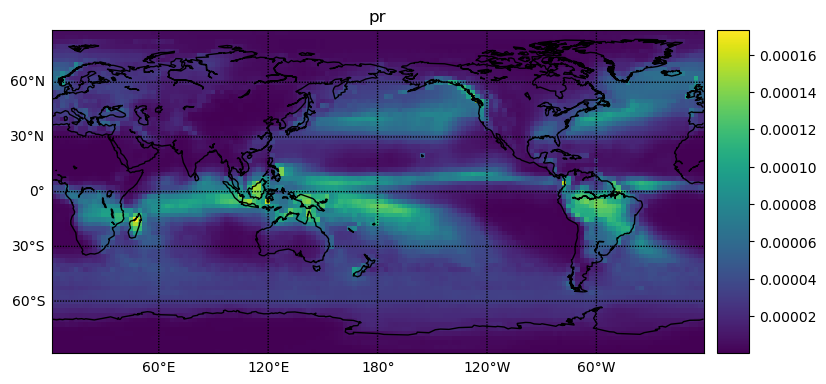

In [2]:
from class_PlotBaseMap import PlotBaseMap

PlotBaseMap(d[0])
# PlotBaseMap(d[0], vmin='0', vmax='0.0003')

# land/sea masking with original grid

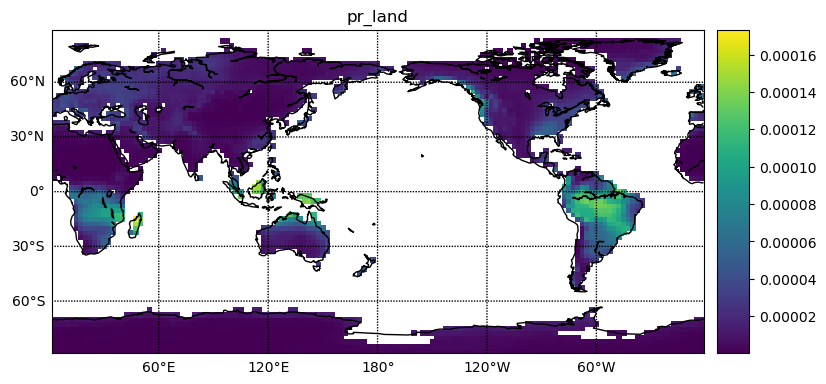

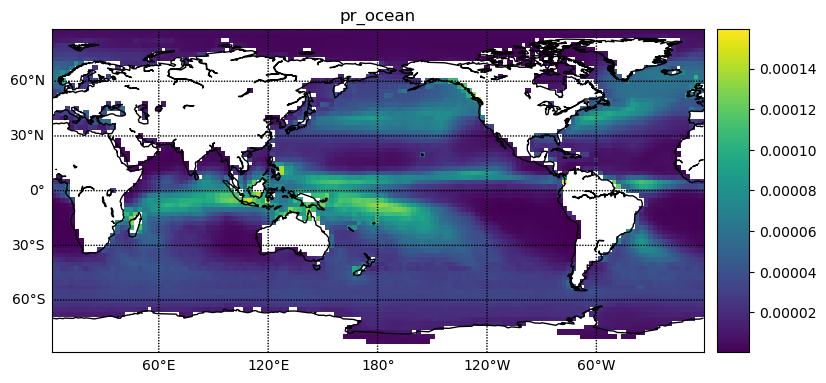

In [3]:
from class_LandSeaMask import LandSeaMask

mask = LandSeaMask(d)

d_land = mask.land()
d_ocean = mask.ocean()

d_land.id = 'pr_land'
PlotBaseMap(d_land[0])
d_ocean.id = 'pr_ocean'
PlotBaseMap(d_ocean[0])

# Write data (nc file)

In [4]:
out = cdms.open('mask_land.nc', 'w')
out.write(d_land[0])
out.close()

out = cdms.open('mask_ocean.nc', 'w')
out.write(d_ocean[0])
out.close()

/export/ahn6/anaconda3/envs/pmp_v20200601/lib/python3.8/site-packages/cdms2/dataset.py:2164: Warning: Files are written with compression and no shuffling
You can query different values of compression using the functions:
cdms2.getNetcdfShuffleFlag() returning 1 if shuffling is enabled, 0 otherwise
cdms2.getNetcdfDeflateFlag() returning 1 if deflate is used, 0 otherwise
cdms2.getNetcdfDeflateLevelFlag() returning the level of compression for the deflate method

If you want to turn that off or set different values of compression use the functions:
value = 0
cdms2.setNetcdfShuffleFlag(value) ## where value is either 0 or 1
cdms2.setNetcdfDeflateFlag(value) ## where value is either 0 or 1
cdms2.setNetcdfDeflateLevelFlag(value) ## where value is a integer between 0 and 9 included

To produce NetCDF3 Classic files use:
cdms2.useNetCDF3()
To Force NetCDF4 output with classic format and no compressing use:
cdms2.setNetcdf4Flag(1)
NetCDF4 file with no shuffling or deflate and noclassic will be 

In [5]:
!jupyter nbconvert --to script test_class.ipynb

[NbConvertApp] Converting notebook test_class.ipynb to script
[NbConvertApp] Writing 1002 bytes to test_class.py
